In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Change this
os.chdir("C:/Users/16472/Desktop/BlastTNG/other_notebooks")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:/Users/16472/Desktop/BlastTNG/other_notebooks'

In [8]:
# Some clever textfile manipulations

exposure_file = open("exposure_time.txt", "r").readlines()
cleaned_lines = []

for line in exposure_file:
    new_line = line.strip("\n ")
    cleaned_lines.append(new_line)

# 4th index represents the camers in use (2 means both)
# 5th index represents the exposure time.

dates = []
camera_use = []
exposure_time = []

for line in cleaned_lines:
    if len(line) == 23:
        dates.append(line)
    if 'javier' in line or 'blast@blast' in line:
        temp = line.split()
        camera_use.append(int(temp[4]))
        exposure_time.append(float(temp[5]))

In [9]:
print("Length of cameras_use:", len(camera_use))
print(camera_use)
print("\nThis should be all 0's")
print(camera_use[6:10] + camera_use [-3:-1])

Length of cameras_use: 53
[2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2]

This should be all 0's
[0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Centiseconds')

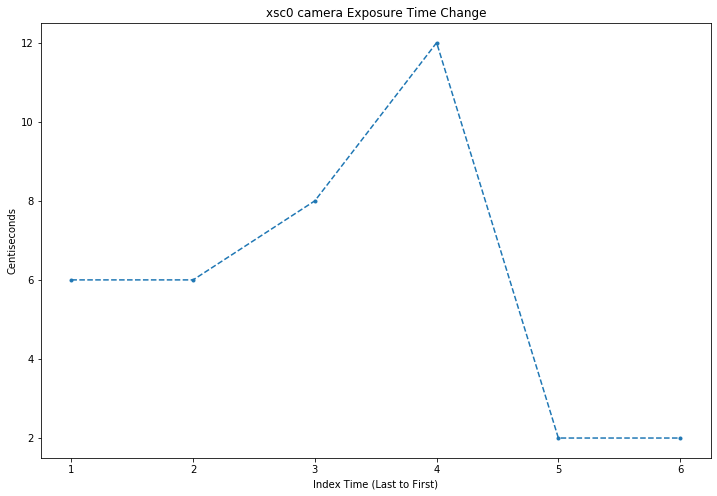

In [10]:
# XSC0 Exposure time
index = np.linspace(1, 6, 6)
xsc0_exposure_time = exposure_time[6:10] + exposure_time [-3:-1]

plt.figure("xsc0 Camera Exposure Time Change", figsize=(12, 8))
plt.title("xsc0 camera Exposure Time Change")
plt.plot(index, xsc0_exposure_time, linestyle='--', marker='.')
plt.xlabel("Index Time (Last to First)")
plt.ylabel("Centiseconds")

In [11]:
# Important INFO

print("Exposure Time for XSC0")
print(exposure_time[6:10] + exposure_time [-3:-1])
print(camera_use[6:10] + camera_use [-3:-1])
print(dates[6:10] + dates[-3:-1])

# xsc0_info = {'date': dates[6:10], 'camera_use':camera_use[6:10], 'exposure':exposure_time[6:10]}

print("\nExposure Time for Both Cameras")
xsc2_exposure_time = exposure_time[:6] + exposure_time[10:-3] + [exposure_time[-1]]
print(xsc2_exposure_time)

print('\nDates for Both Cameras')
xsc2_dates= dates[:6] + dates[10:-3] + [dates[-1]]
print(xsc2_dates)

print("\nCamera Use")
xsc2_camera_use = camera_use[:6] + camera_use[10:-3] + [camera_use[-1]]
print(len(xsc2_camera_use))

Exposure Time for XSC0
[6.0, 6.0, 8.0, 12.0, 2.0, 2.0]
[0, 0, 0, 0, 0, 0]
['Tue Jan 7 07:40:31 2020', 'Tue Jan 7 07:32:44 2020', 'Tue Jan 7 07:32:23 2020', 'Tue Jan 7 07:32:11 2020', 'Mon Jan 6 18:51:54 2020', 'Mon Jan 6 18:51:28 2020']

Exposure Time for Both Cameras
[8.0, 8.0, 7.0, 12.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 12.0, 12.0, 12.0, 8.0, 8.0, 18.0, 12.0, 12.0, 16.0, 15.0, 20.0, 24.0, 30.0, 18.0, 18.0, 18.0, 12.0, 4.0, 8.0, 18.0, 24.0, 24.0, 16.0, 16.0, 8.0, 24.0, 18.0, 15.0, 15.0, 12.0, 9.0, 6.0, 6.0, 3.0, 6.0, 2.0, 12.0]

Dates for Both Cameras
['Tue Jan 7 10:52:56 2020', 'Tue Jan 7 07:47:37 2020', 'Tue Jan 7 07:43:46 2020', 'Tue Jan 7 07:43:21 2020', 'Tue Jan 7 07:42:06 2020', 'Tue Jan 7 07:41:33 2020', 'Tue Jan 7 07:11:58 2020', 'Tue Jan 7 07:09:04 2020', 'Tue Jan 7 07:01:35 2020', 'Tue Jan 7 07:01:17 2020', 'Tue Jan 7 07:00:32 2020', 'Tue Jan 7 06:59:09 2020', 'Tue Jan 7 06:29:29 2020', 'Tue Jan 7 06:26:03 2020', 'Tue Jan 7 06:21:58 2020', 'Tue Jan 7 06:21:30 2020', 'Tue Jan 7 

Text(0, 0.5, 'CENTISECONDS')

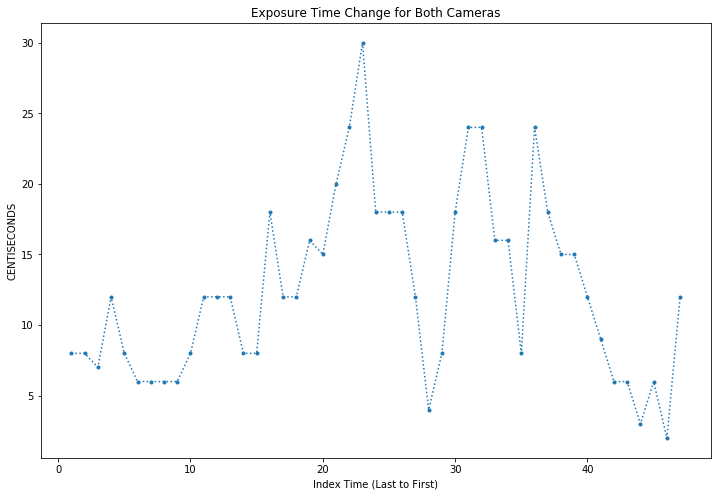

In [12]:
fake_time = np.linspace(1, 47, 47)

plt.figure("Exposure Time Change for Both Cameras", figsize= (12, 8))
plt.title("Exposure Time Change for Both Cameras")
plt.plot(fake_time, xsc2_exposure_time, linestyle=":", marker=".")
plt.xlabel("Index Time (Last to First)")
plt.ylabel("CENTISECONDS")

In [15]:
# Converting our ELOG data to make sense of them...
# This is the data for XSC1!

split_dates = [] 
for dt in dates:
    cur_date = dt.split()
    split_dates.append(cur_date[3])
     
xsc2_dates = split_dates[:6] + split_dates[10:-3] + [split_dates[-1]]
xsc2_exposure_time = exposure_time[:6] + exposure_time[10:-3] + [exposure_time[-1]]
xsc2_camera_use = camera_use[:6] + camera_use[10:-3] + [camera_use[-1]]

# Split into DAY 7 and DAY 6

# DAY 7
xsc1_time_day_7 = xsc2_dates[:-11]
xsc1_day_7_seconds = [convert_day_to_seconds(i) for i in xsc1_time_day_7]
xsc1_exposure_time_day_7 = xsc2_exposure_time[:-11]
xsc1_camera_use_day_7 = xsc2_camera_use[:-11]

# DAY 6
xsc1_time_day_6 = xsc2_dates[-11:]
xsc1_day_6_seconds = [convert_day_to_seconds(i) for i in xsc1_time_day_6]
xsc1_exposure_time_day_6 = xsc2_exposure_time[-11:]
xsc1_camera_use_day_6 = xsc2_camera_use[-11:]

# Should add to 47...
print(len(xsc1_time_day_7) + len(xsc1_time_day_6))

47


In [16]:
# Converting our ELOG data to make sense of them...
# This is the data for XSC0!

xsc0_dates = split_dates
xsc0_exposure_time = exposure_time
xsc0_camera_use = camera_use

# Elog file info for xsc0 camera day 7.
xsc0_time_day_7 = xsc0_dates[:-13]
xsc0_day_7_seconds = [convert_day_to_seconds(i) for i in xsc0_time_day_7]
xsc0_exposure_time_day_7 = xsc0_exposure_time[:-13]
xsc0_camera_use_day_7 = xsc0_camera_use[:-13]

# Elog file info for xsc0 camera day 6.
xsc0_time_day_6 = xsc0_dates[-13:]
xsc0_day_6_seconds = [convert_day_to_seconds(i) for i in xsc0_time_day_6]
xsc0_exposure_time_day_6 = xsc0_exposure_time[-13:]
xsc0_camera_use_day_6 = xsc0_camera_use[-13:]

In [17]:
# A function, that takes in a fits file (name) and returns the exposure time from that timestamp.
# Star camera image, time-stamp. What was the last command to change the star camera (either 2 or 0)
# use this to figure out what the exposure time was set to.

# what is the exposure time for each fits file in xsc0 and xsc1 images.

# Ex. Give time stamp ---- python function returns -----> what is the exposure time + time it takes.
# Later we want to integrate the gyros where we will need getdata.

        
def convert_day_to_seconds(day_time):
    if ':' in day_time:
        time = day_time.split(':')
    elif '-' in day_time:
        time = day_time.split('-')
    hours = 60 * 60 * int(time[0])
    minutes = 60 * int(time[1])
    seconds = int(time[2])
    total_seconds = hours + minutes + seconds
    return total_seconds

def return_exposure_time(file_name, camera=1):
    """
    2020-01-07--04-14-24--151.fits is an example file name. The
    time stamp here is 04-14-24.
    
    camera is either 0 or 1 for xsc0 or xsc1.
    """
    time_stamp = file_name.split('-')[2:7]
    day = int(time_stamp[0]) 
    hour = int(time_stamp[2])
    minute = int(time_stamp[3])
    second = int(time_stamp[4])
    dt_time = time_stamp[2] + ':' + time_stamp[3] + ':' + time_stamp[4]
    cur_time = convert_day_to_seconds(dt_time)
    index = 0
    if day == 7:
        if camera == 1:
            for time in xsc1_day_7_seconds:
                if cur_time > time:
                    break
                index += 1
            print("The Star Camera is XSC" + str(camera))
            print("The Exposure time at " + str(dt_time) + " on Day " + str(day) + " is between: ")
            print(str(xsc1_exposure_time_day_7[index - 1:index + 1]) + " centi-seconds")
            print("The TRUE exposure time is:", str(xsc1_exposure_time_day_7[index]), "centi-seconds")            
        elif camera == 0:
            for time in xsc0_day_7_seconds:
                if cur_time > time:
                    break
                index += 1
            print("The Star Camera is XSC" + str(camera))
            print("The Exposure time at " + str(dt_time) + " on Day " + str(day) + " is between: ")
            print(str(xsc0_exposure_time_day_7[index - 1:index + 1]) + " centi-seconds")
            print("The TRUE exposure time is:", str(xsc0_exposure_time_day_7[index]), "centi-seconds")
    elif day == 6:
        if camera == 1:
            for time in xsc1_day_6_seconds:
                if cur_time > time:
                    break
                index += 1
            print("The Star Camera is XSC" + str(camera))
            print("The Exposure Time at " + str(dt_time) + " on Day " + str(day) + " is between: ")
            print(str(xsc1_exposure_time_day_6[index - 1:index + 1]) + " centi-seconds")
            print("The TRUE exposure time is:", str(xsc1_exposure_time_day_6[index]), "centi-seconds")
        elif camera == 0:
            for time in xsc0_day_6_seconds:
                if cur_time > time:
                    break
                index += 1
            print("The Star Camera is XSC" + str(camera))
            print("The Exposure time at " + str(dt_time) + " on Day " + str(day) + " is between: ")
            print(str(xsc0_exposure_time_day_6[index - 1:index + 1]) + " centi-seconds")
            print("The TRUE exposure time is:", str(xsc0_exposure_time_day_6[index]), "centi-seconds")


In [19]:
return_exposure_time("2020-01-07--04-14-24--151.fits", camera=1)

The Star Camera is XSC1
The Exposure time at 04:14:24 on Day 7 is between: 
[12.0, 16.0] centi-seconds
The TRUE exposure time is: 16.0 centi-seconds


In [ ]:
# Find index for each of these star camera exposure
# file_name -> get the appropriate index.
# extract the gyroscope data (GY_az), (GY_el)
# e.g. for 2020-01-07--04-14-24--151.fits"
# starting at the index, want to take 16 centi-seconds worth of data.
# Look at format files and the fields. This will tell us how many samples we want to record.
# assume the star starts at (0, 0), we want to integrate across GY_el. GY_az.
# Azimuth is referenced relative to your elevation.
# Want to integrate GY_az * cosine(elevation) <- X-direction. Y-velocity is GY_el.
# Ultimately, returns a position of where we think the star should be for all the sample points during the exposure time.
# when adding a gaussian, every position that you solve for after integrating it, should return something similar to our 
# smeared star. Check this against the image and compare the 2.
#
# Figure out how big the point spread function is.
##################################################